First, import classes defined in sentiments.py (NaiveBayes, MutualInformation, MaxDisc)

In [10]:
import sentiments

In [113]:
import importlib
importlib.reload(sentiments)

<module 'sentiments' from '/Users/coleholcomb/Dropbox/Academics/Classes/COS424/sentiment-analysis/sentiments.py'>

Generate data files associated with feature sets using preprocessSentences.py and sentiments.py

In [54]:
import os

train = 'train.txt'
test = 'test.txt'

tf_thresholds = [1,2,3,4,5,7,10,15,20,30,50,70]
mi_thresholds = [10,20,50,75,100,200,300,400,500,1000,1621]
jd_thresholds = [10,20,50,75,100,200,300,400,500,1000,1621]

for i in tf_thresholds:
    os.system('python preprocessSentences.py -d '+train+' --threshold '+str(i))
    os.system('python preprocessSentences.py -d '+test+' -v "out_vocab_'+str(i)+'.txt" -o "tf_'+str(i)+'_test"')
   
full_vocab = open('out_vocab_1.txt', 'r', encoding='utf-8').read(-1).split('\n')
full_features = pd.read_csv('out_bag_of_words_1.csv', sep=',',header=None)
labels = np.genfromtxt('out_classes_1.txt', delimiter='\n')
for i in mi_thresholds:
    filt = sentiments.MutualInformation(full_features, labels, full_vocab, i)
    os.system('python preprocessSentences.py -d '+test+' -v "mi_'+str(i)+'_vocab_1.txt" -o "mi_'+str(i)+'_test"')

for i in jd_thresholds:
    filt = sentiments.MaxDisc(full_features, labels, full_vocab, i)
    os.system('python preprocessSentences.py -d '+test+' -v "jd_'+str(i)+'_vocab_1.txt" -o "jd_'+str(i)+'_test"')
    

In [127]:
import pandas as pd
import numpy as np

jd_acc = []
jd_prec = []
jd_rec = []
jd_spec = []
for i in jd_thresholds:
    testfeatures = pd.read_csv('jd_'+str(i)+'_test_bag_of_words_0.csv', sep=',', header=None)
    testlabels = np.genfromtxt('jd_'+str(i)+'_test_classes_0.txt', delimiter='\n')

    features=pd.read_csv('jd_'+str(i)+'_bag_of_words_1.csv', sep=',',header=None)
    labels = np.genfromtxt('out_classes_1.txt', delimiter='\n')

    nb = sentiments.NaiveBayes()
    nb.train(features,labels)
    acc, prec, rec, spec = nb.test(testfeatures, testlabels)
    jd_acc.append((i, acc))
    jd_prec.append((i, prec))
    jd_rec.append((i, rec))
    jd_spec.append((i, spec))

mi_acc = []
mi_prec = []
mi_rec = []
mi_spec = []
for i in mi_thresholds:
    testfeatures = pd.read_csv('mi_'+str(i)+'_test_bag_of_words_0.csv', sep=',', header=None)
    testlabels = np.genfromtxt('mi_'+str(i)+'_test_classes_0.txt', delimiter='\n')

    features=pd.read_csv('mi_'+str(i)+'_bag_of_words_1.csv', sep=',',header=None)
    labels = np.genfromtxt('out_classes_1.txt', delimiter='\n')

    nb = sentiments.NaiveBayes()
    nb.train(features,labels)
    acc, prec, rec, spec = nb.test(testfeatures, testlabels)
    mi_acc.append((i, acc))
    mi_prec.append((i, prec))
    mi_rec.append((i, rec))
    mi_spec.append((i, spec))

tf_acc = []
tf_prec = []
tf_rec = []
tf_spec = []
tf_nfeatures = []
for i in tf_thresholds:
    testfeatures = pd.read_csv('tf_'+str(i)+'_test_bag_of_words_0.csv', sep=',', header=None)
    testlabels = np.genfromtxt('tf_'+str(i)+'_test_classes_0.txt', delimiter='\n')

    features=pd.read_csv('out_bag_of_words_'+str(i)+'.csv', sep=',',header=None)
    labels = np.genfromtxt('out_classes_'+str(i)+'.txt', delimiter='\n')

    nb = sentiments.NaiveBayes()
    nb.train(features,labels)
    acc, prec, rec, spec = nb.test(testfeatures, testlabels)
    tf_acc.append((nb.nfeatures, acc))
    tf_prec.append((nb.nfeatures, prec))
    tf_rec.append((nb.nfeatures, rec))
    tf_spec.append((nb.nfeatures, spec))
    tf_nfeatures.append((i, nb.nfeatures))

In [128]:
print(tf_acc[0])
print(tf_prec[0])
print(tf_rec[0])
print(tf_spec[0])


print(tf_acc[10])
print(tf_prec[10])
print(tf_rec[10])
print(tf_spec[10])

(1621, 0.8083333333333333)
(1621, 0.8178694158075601)
(1621, 0.7933333333333333)
(1621, 0.8233333333333334)
(28, 0.6466666666666666)
(28, 0.7528735632183908)
(28, 0.43666666666666665)
(28, 0.8566666666666667)


Produce accuracy, precision, recall, specificity plots for varying number of features included

In [147]:
import matplotlib.pyplot as plt

f, ((acc, prec),(rec, spec)) = plt.subplots(2,2)

acc.plot([x[0] for x in jd_acc], [x[1] for x in jd_acc], label='JD')
acc.plot([x[0] for x in mi_acc], [x[1] for x in mi_acc], label='MI')
acc.plot([x[0] for x in tf_acc], [x[1] for x in tf_acc], label='TF')
acc.scatter([x[0] for x in jd_acc], [x[1] for x in jd_acc])
acc.scatter([x[0] for x in mi_acc], [x[1] for x in mi_acc])
acc.scatter([x[0] for x in tf_acc], [x[1] for x in tf_acc])
acc.set_xscale('log')
acc.set_xlabel('# of features')
acc.set_ylabel('Accuracy')
acc.legend()

prec.plot([x[0] for x in jd_acc], [x[1] for x in jd_prec], label='JD')
prec.plot([x[0] for x in mi_acc], [x[1] for x in mi_prec], label='MI')
prec.plot([x[0] for x in tf_acc], [x[1] for x in tf_prec], label='TF')
prec.scatter([x[0] for x in jd_acc], [x[1] for x in jd_prec])
prec.scatter([x[0] for x in mi_acc], [x[1] for x in mi_prec])
prec.scatter([x[0] for x in tf_acc], [x[1] for x in tf_prec])
prec.set_xscale('log')
prec.set_xlabel('# of features')
prec.set_ylabel('Precision')
prec.yaxis.set_label_position("right")
prec.yaxis.tick_right()

rec.plot([x[0] for x in jd_acc], [x[1] for x in jd_rec], label='JD')
rec.plot([x[0] for x in mi_acc], [x[1] for x in mi_rec], label='MI')
rec.plot([x[0] for x in tf_acc], [x[1] for x in tf_rec], label='TF')
rec.scatter([x[0] for x in jd_acc], [x[1] for x in jd_rec])
rec.scatter([x[0] for x in mi_acc], [x[1] for x in mi_rec])
rec.scatter([x[0] for x in tf_acc], [x[1] for x in tf_rec])
rec.set_xscale('log')
rec.set_xlabel('# of features')
rec.set_ylabel('Recall')

spec.plot([x[0] for x in jd_acc], [x[1] for x in jd_spec], label='JD')
spec.plot([x[0] for x in mi_acc], [x[1] for x in mi_spec], label='MI')
spec.plot([x[0] for x in tf_acc], [x[1] for x in tf_spec], label='TF')
spec.scatter([x[0] for x in jd_acc], [x[1] for x in jd_spec])
spec.scatter([x[0] for x in mi_acc], [x[1] for x in mi_spec])
spec.scatter([x[0] for x in tf_acc], [x[1] for x in tf_spec])
spec.set_xscale('log')
spec.set_xlabel('# of features')
spec.set_ylabel('Specificity')
spec.yaxis.set_label_position("right")
spec.yaxis.tick_right()

f.savefig('NB-all.jpeg')
f.show()

/Users/coleholcomb/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


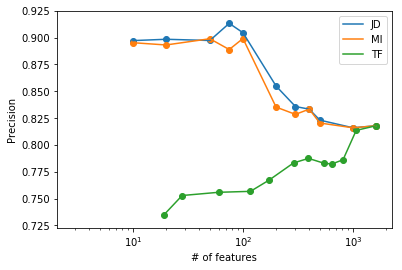

In [130]:
plt.plot([x[0] for x in jd_acc], [x[1] for x in jd_prec], label='JD')
plt.plot([x[0] for x in mi_acc], [x[1] for x in mi_prec], label='MI')
plt.plot([x[0] for x in tf_acc], [x[1] for x in tf_prec], label='TF')
plt.scatter([x[0] for x in jd_acc], [x[1] for x in jd_prec])
plt.scatter([x[0] for x in mi_acc], [x[1] for x in mi_prec])
plt.scatter([x[0] for x in tf_acc], [x[1] for x in tf_prec])
plt.xscale('log')
plt.xlabel('# of features')
plt.ylabel('Precision')
plt.legend()
plt.savefig('NB-Precision.jpeg')
plt.show()

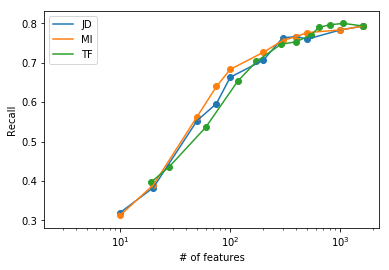

In [131]:
plt.plot([x[0] for x in jd_acc], [x[1] for x in jd_rec], label='JD')
plt.plot([x[0] for x in mi_acc], [x[1] for x in mi_rec], label='MI')
plt.plot([x[0] for x in tf_acc], [x[1] for x in tf_rec], label='TF')
plt.scatter([x[0] for x in jd_acc], [x[1] for x in jd_rec])
plt.scatter([x[0] for x in mi_acc], [x[1] for x in mi_rec])
plt.scatter([x[0] for x in tf_acc], [x[1] for x in tf_rec])
plt.xscale('log')
plt.xlabel('# of features')
plt.ylabel('Recall')
plt.legend()
plt.savefig('NB-Recall.jpeg')
plt.show()

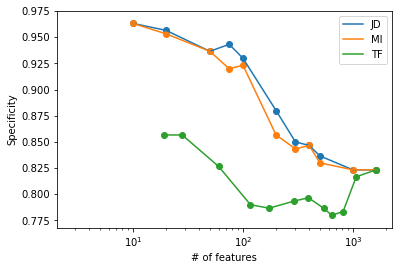

In [132]:
plt.plot([x[0] for x in jd_acc], [x[1] for x in jd_spec], label='JD')
plt.plot([x[0] for x in mi_acc], [x[1] for x in mi_spec], label='MI')
plt.plot([x[0] for x in tf_acc], [x[1] for x in tf_spec], label='TF')
plt.scatter([x[0] for x in jd_acc], [x[1] for x in jd_spec])
plt.scatter([x[0] for x in mi_acc], [x[1] for x in mi_spec])
plt.scatter([x[0] for x in tf_acc], [x[1] for x in tf_spec])
plt.xscale('log')
plt.xlabel('# of features')
plt.ylabel('Specificity')
plt.legend()
plt.savefig('NB-Specificity.jpeg')
plt.show()

In [94]:
from sklearn.svm import SVC, LinearSVC

testfeatures = pd.read_csv('tf_1_test_bag_of_words_0.csv', sep=',', header=None)
testlabels = np.genfromtxt('tf_1_test_classes_0.txt', delimiter='\n')

features=pd.read_csv('out_bag_of_words_1.csv', sep=',',header=None)
labels = np.genfromtxt('out_classes_1.txt', delimiter='\n')

svc = SVC()
svc.fit(features, labels)

linsvc = LinearSVC()
linsvc.fit(features, labels) 
testpred = svc.predict(testfeatures)
ntest = testlabels.shape[0]
correct, false = 0, 0
tp, fp, tn, fn = 0, 0, 0, 0
for i in range(ntest):
    if testpred[i] == testlabels[i]:
        correct += 1
        if testlabels[i] == 1:
            tp += 1
        else:
            tn += 1
    elif testpred[i] == 1:
        fp += 1
        false += 1
    else:
        fn +=1
        false +=1

print('Percentage correct:         {}'.format(correct/ntest))
print('Percentage incorrect:       {}'.format(false/ntest))
print('Precision          :        {}'.format(tp/(tp + fp)))
print('Recall true positives:      {}'.format(tp/(tp + fn)))
print('Specificity true negatives: {}'.format(tn/(tn + fp)))
print('rate false positives:       {}'.format(fp/(fp + tn)))
print('rate false negatives:       {}'.format(fn/(fn + tp)))
print('f1                  :       {}'.format(2*(tp/(tp+fn))*(tp/(tp + fp))/((tp/(tp + fn))+(tp/(tp + fp)))))
print('\n')

testpred = linsvc.predict(testfeatures)
ntest = testlabels.shape[0]
correct, false = 0, 0
tp, fp, tn, fn = 0, 0, 0, 0
for i in range(ntest):
    if testpred[i] == testlabels[i]:
        correct += 1
        if testlabels[i] == 1:
            tp += 1
        else:
            tn += 1
    elif testpred[i] == 1:
        fp += 1
        false += 1
    else:
        fn +=1
        false +=1

print('Percentage correct:         {}'.format(correct/ntest))
print('Percentage incorrect:       {}'.format(false/ntest))
print('Precision          :        {}'.format(tp/(tp + fp)))
print('Recall true positives:      {}'.format(tp/(tp + fn)))
print('Specificity true negatives: {}'.format(tn/(tn + fp)))
print('rate false positives:       {}'.format(fp/(fp + tn)))
print('rate false negatives:       {}'.format(fn/(fn + tp)))
print('f1                  :       {}'.format(2*(tp/(tp+fn))*(tp/(tp + fp))/((tp/(tp + fn))+(tp/(tp + fp)))))



Percentage correct:         0.57
Percentage incorrect:       0.43
Precision          :        0.9375
Recall true positives:      0.15
Specificity true negatives: 0.99
rate false positives:       0.01
rate false negatives:       0.85
f1                  :       0.25862068965517243


Percentage correct:         0.7883333333333333
Percentage incorrect:       0.21166666666666667
Precision          :        0.8239700374531835
Recall true positives:      0.7333333333333333
Specificity true negatives: 0.8433333333333334
rate false positives:       0.15666666666666668
rate false negatives:       0.26666666666666666
f1                  :       0.7760141093474426


In [108]:
from sklearn.tree import DecisionTreeClassifier
from operator import itemgetter

dtgini = DecisionTreeClassifier()
dtgini.fit(features, labels)

dtentropy = DecisionTreeClassifier(criterion='entropy')
dtentropy.fit(features, labels) 

#%%
testpred = dtgini.predict(testfeatures)
ntest = testlabels.shape[0]
correct, false = 0, 0
tp, fp, tn, fn = 0, 0, 0, 0
for i in range(ntest):
    if testpred[i] == testlabels[i]:
        correct += 1
        if testlabels[i] == 1:
            tp += 1
        else:
            tn += 1
    elif testpred[i] == 1:
        fp += 1
        false += 1
    else:
        fn +=1
        false +=1

print('Percentage correct:         {}'.format(correct/ntest))
print('Percentage incorrect:       {}'.format(false/ntest))
print('Precision          :        {}'.format(tp/(tp + fp)))
print('Recall true positives:      {}'.format(tp/(tp + fn)))
print('Specificity true negatives: {}'.format(tn/(tn + fp)))
print('rate false positives:       {}'.format(fp/(fp + tn)))
print('rate false negatives:       {}'.format(fn/(fn + tp)))
print('f1                  :       {}'.format(2*(tp/(tp+fn))*(tp/(tp + fp))/((tp/(tp + fn))+(tp/(tp + fp)))))
print('\n')

testpred = dtentropy.predict(testfeatures)
ntest = testlabels.shape[0]
correct, false = 0, 0
tp, fp, tn, fn = 0, 0, 0, 0
for i in range(ntest):
    if testpred[i] == testlabels[i]:
        correct += 1
        if testlabels[i] == 1:
            tp += 1
        else:
            tn += 1
    elif testpred[i] == 1:
        fp += 1
        false += 1
    else:
        fn +=1
        false +=1

print('Percentage correct:         {}'.format(correct/ntest))
print('Percentage incorrect:       {}'.format(false/ntest))
print('Precision          :        {}'.format(tp/(tp + fp)))
print('Recall true positives:      {}'.format(tp/(tp + fn)))
print('Specificity true negatives: {}'.format(tn/(tn + fp)))
print('rate false positives:       {}'.format(fp/(fp + tn)))
print('rate false negatives:       {}'.format(fn/(fn + tp)))
print('f1                  :       {}'.format(2*(tp/(tp+fn))*(tp/(tp + fp))/((tp/(tp + fn))+(tp/(tp + fp)))))
print('\n')

word_importance_gini = [(x,y) for x,y in zip(full_vocab, dtgini.feature_importances_)]
word_importance_entr = [(x,y) for x,y in zip(full_vocab, dtentropy.feature_importances_)]
print('Top ten most predictive words according to DT:')
print(sorted(word_importance_gini, key=itemgetter(1), reverse=True)[:10])
print(sorted(word_importance_entr, key=itemgetter(1), reverse=True)[:10])

Percentage correct:         0.755
Percentage incorrect:       0.245
Precision          :        0.7610921501706485
Recall true positives:      0.7433333333333333
Specificity true negatives: 0.7666666666666667
rate false positives:       0.23333333333333334
rate false negatives:       0.25666666666666665
f1                  :       0.7521079258010118


Percentage correct:         0.7583333333333333
Percentage incorrect:       0.24166666666666667
Precision          :        0.7818181818181819
Recall true positives:      0.7166666666666667
Specificity true negatives: 0.8
rate false positives:       0.2
rate false negatives:       0.2833333333333333
f1                  :       0.7478260869565218


Top ten most predictive words according to DT:
[('great', 0.060656820104629312), ('love', 0.027639964937479184), ('good', 0.025490697778373119), ('excel', 0.021237608713509624), ('bad', 0.021123804256242152), ('nice', 0.014161566947156116), ('best', 0.013720137889676036), ('amaz', 0.0117756544820